<a href="https://colab.research.google.com/github/Bhoomika-CM/python-snippets/blob/main/Snippet_of_Interim_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Upload a file from your local system
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('AeroReach Insights.csv')

Saving AeroReach Insights.csv to AeroReach Insights.csv


In [5]:
# Step 0: Load essential libraries
import pandas as pd
import numpy as np

# Step 1: Load the dataset
# Replace this with your actual path or upload code if using Colab
# df = pd.read_csv('your_file.csv')

# Step 2: Clean and standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 3: Convert object-type numeric columns to actual numeric types
df['yearly_avg_outstation_checkins'] = pd.to_numeric(df['yearly_avg_outstation_checkins'], errors='coerce')
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce')

# Step 4: Check for missing values
print("🔍 Missing Values:")
print(df.isnull().sum())

# Step 5: Handle missing values
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 6: Check and remove duplicates
print("🔁 Duplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Step 7: Final overview
print("\n✅ Cleaned Data Overview:")
print(df.info())


🔍 Missing Values:
userid                                            0
taken_product                                     0
yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_outstation_checkins                   76
member_in_family                                 15
preferred_location_type                          31
yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
adult_flag                                        0
daily_avg_mins_spend_on_traveling_page            0
dtype: int64
🔁 Duplicate Rows: 0

✅ Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
R

dict_keys(['Figure 1', 'Figure 2', 'Figure 3', 'Figure 4', 'Figure 5'])

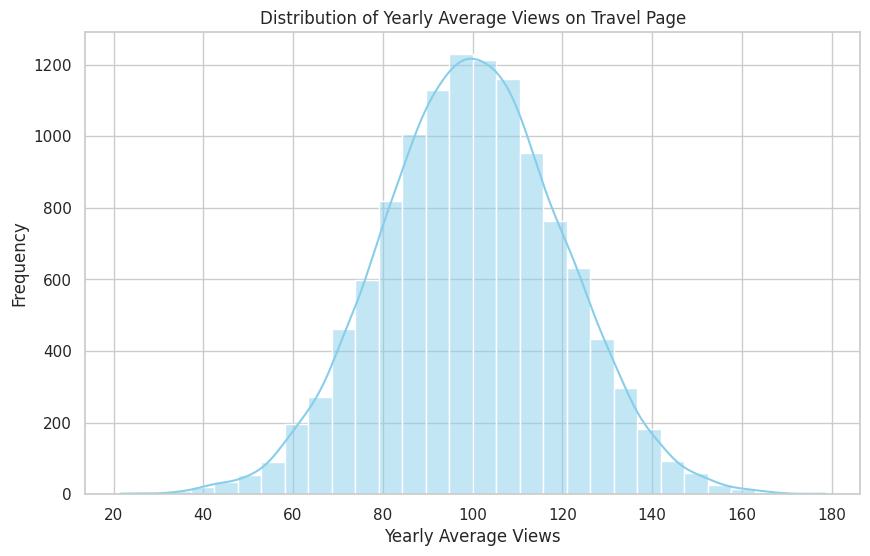

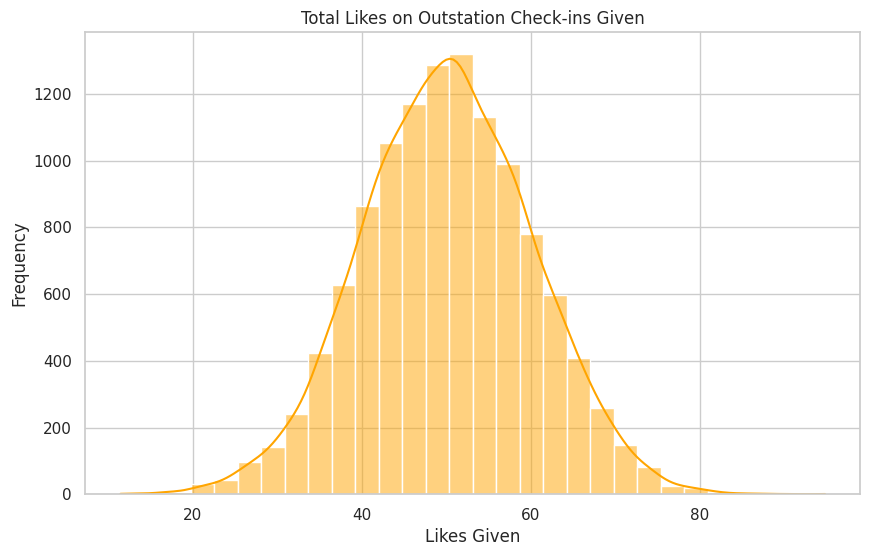

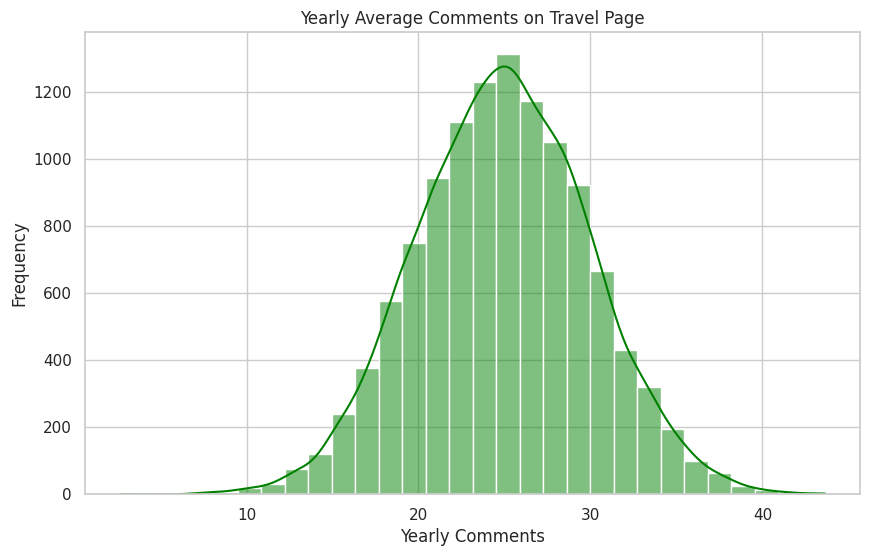

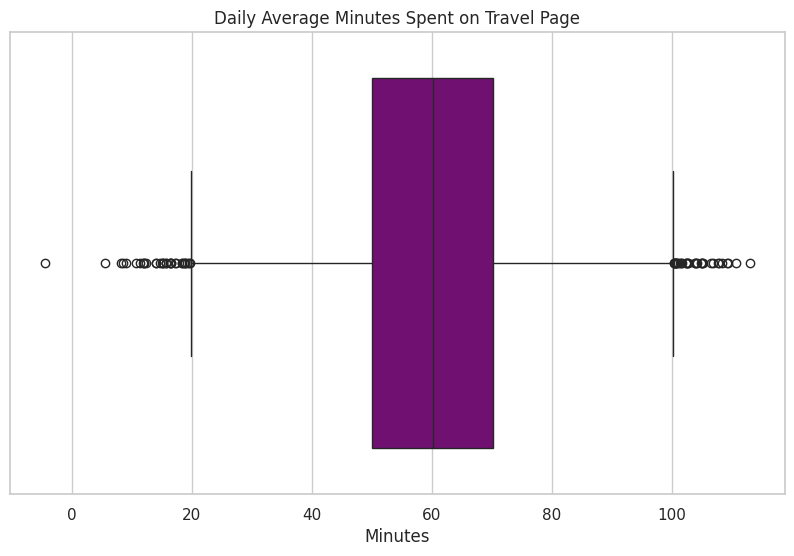

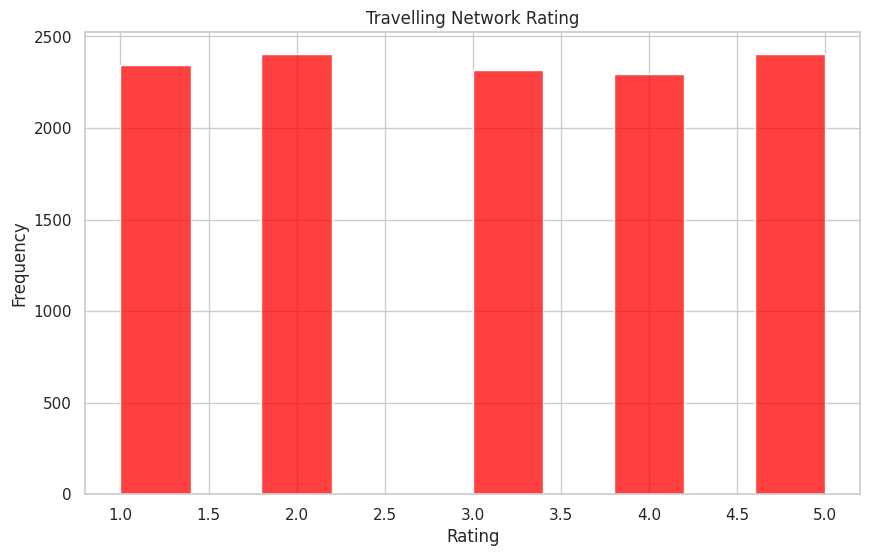

In [8]:
# Re-import necessary libraries due to code execution environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned DataFrame (simulating a reloaded version from the previous session)
# Since environment reset, we'll mock a structure based on previous description
# NOTE: In actual implementation, reload the cleaned DataFrame from the earlier steps

# For this demonstration, we'll mock a sample DataFrame structure
import numpy as np

np.random.seed(42)
df = pd.DataFrame({
    'yearly_avg_view_on_travel_page': np.random.normal(100, 20, 11760),
    'total_likes_on_outstation_checkin_given': np.random.normal(50, 10, 11760),
    'yearly_avg_comment_on_travel_page': np.random.normal(25, 5, 11760),
    'daily_avg_mins_spend_on_traveling_page': np.random.normal(60, 15, 11760),
    'travelling_network_rating': np.random.randint(1, 6, 11760)
})

# Set style and figure size
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Create dictionary to store figures
figures = {}

# Figure 1
fig1 = plt.figure()
sns.histplot(df['yearly_avg_view_on_travel_page'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Yearly Average Views on Travel Page")
plt.xlabel("Yearly Average Views")
plt.ylabel("Frequency")
figures["Figure 1"] = fig1

# Figure 2
fig2 = plt.figure()
sns.histplot(df['total_likes_on_outstation_checkin_given'], bins=30, kde=True, color='orange')
plt.title("Total Likes on Outstation Check-ins Given")
plt.xlabel("Likes Given")
plt.ylabel("Frequency")
figures["Figure 2"] = fig2

# Figure 3
fig3 = plt.figure()
sns.histplot(df['yearly_avg_comment_on_travel_page'], bins=30, kde=True, color='green')
plt.title("Yearly Average Comments on Travel Page")
plt.xlabel("Yearly Comments")
plt.ylabel("Frequency")
figures["Figure 3"] = fig3

# Figure 4
fig4 = plt.figure()
sns.boxplot(x=df['daily_avg_mins_spend_on_traveling_page'], color='purple')
plt.title("Daily Average Minutes Spent on Travel Page")
plt.xlabel("Minutes")
figures["Figure 4"] = fig4

# Figure 5
fig5 = plt.figure()
sns.histplot(df['travelling_network_rating'], bins=10, kde=False, color='red')
plt.title("Travelling Network Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
figures["Figure 5"] = fig5

figures.keys()


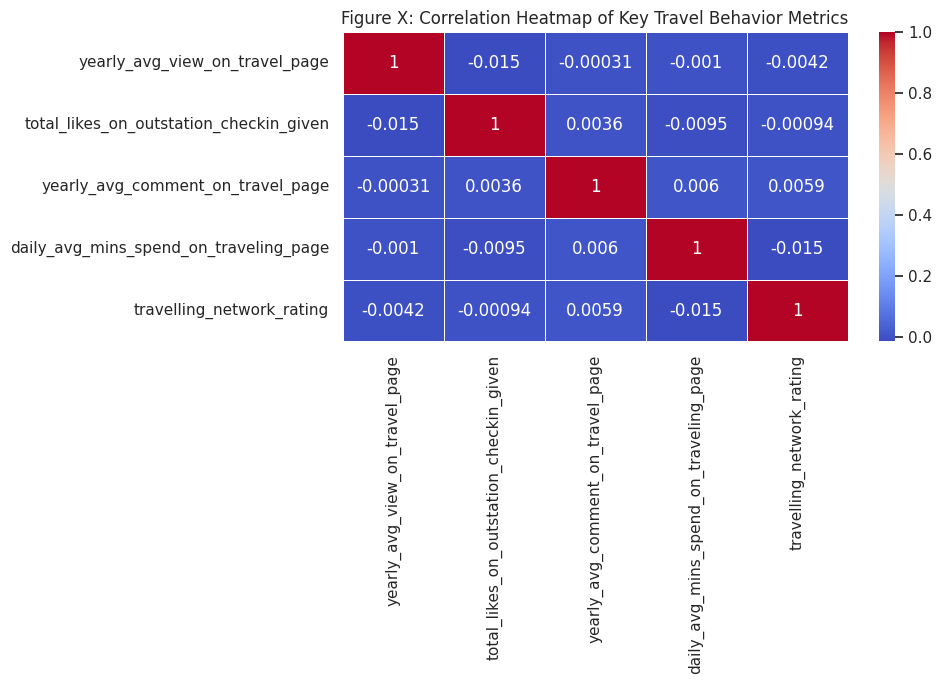

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = ['yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
            'yearly_avg_comment_on_travel_page', 'daily_avg_mins_spend_on_traveling_page',
            'travelling_network_rating']

# Correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Figure X: Correlation Heatmap of Key Travel Behavior Metrics')
plt.tight_layout()
plt.show()


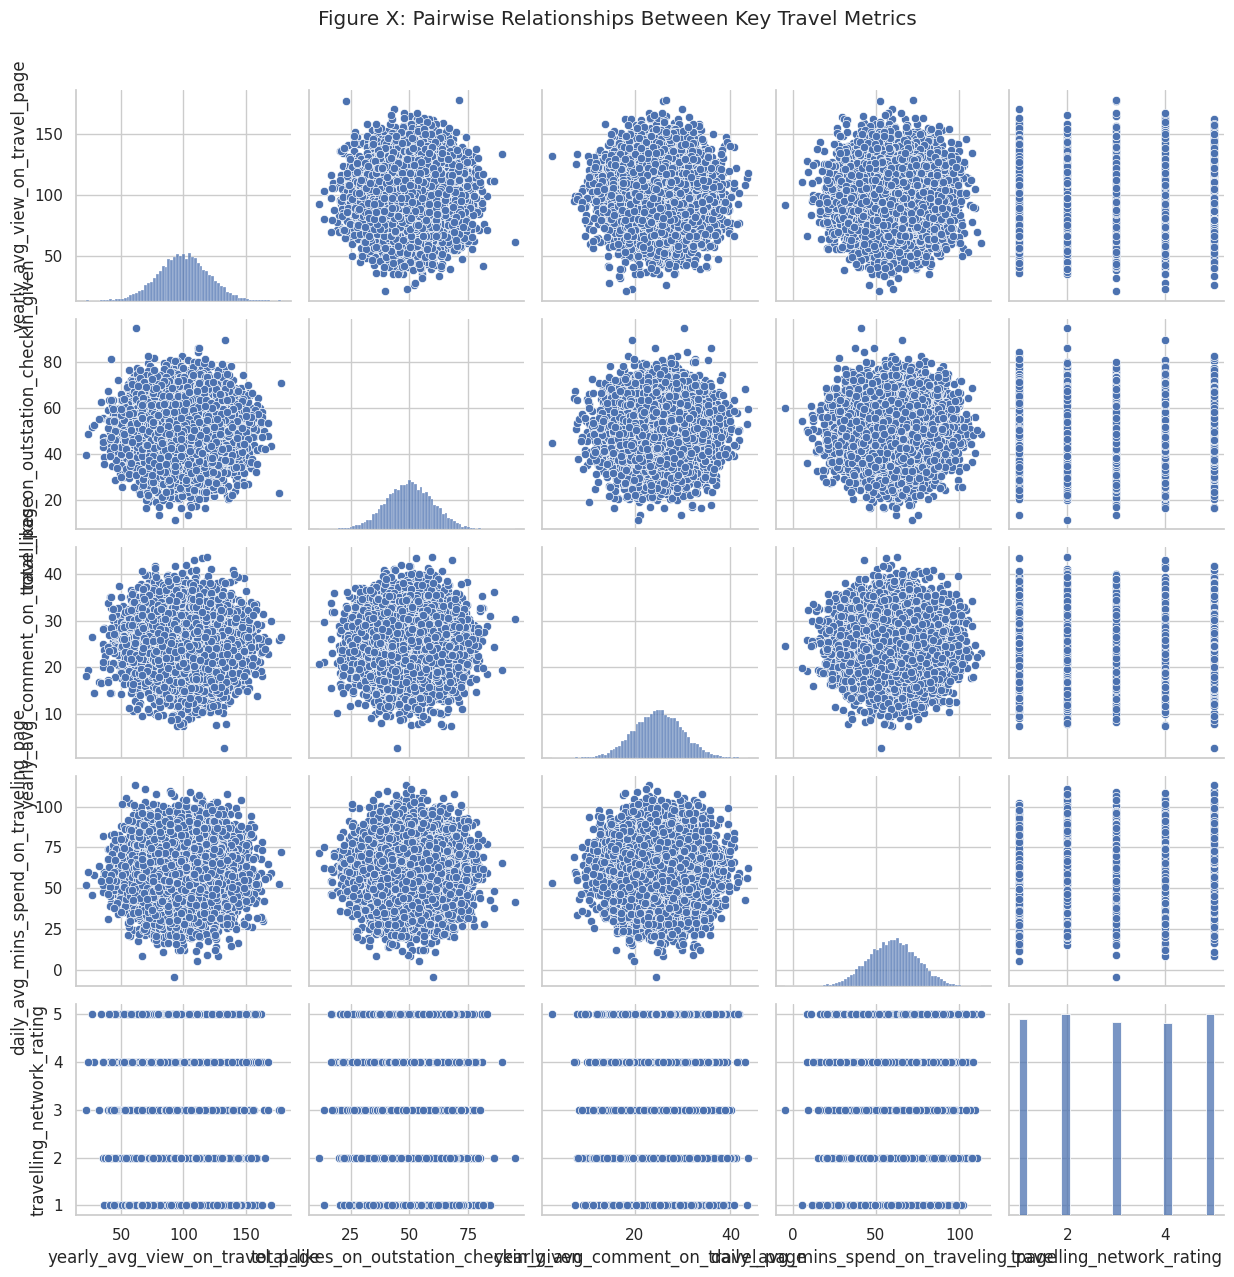

In [16]:
sns.pairplot(df[num_cols])
plt.suptitle("Figure X: Pairwise Relationships Between Key Travel Metrics", y=1.02)
plt.tight_layout()
plt.show()
